In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
# Load your CSV file into a DataFrame
df = pd.read_csv('book1.csv', encoding='ISO-8859-1')

In [15]:
# Display the first few rows of your dataset to understand its structure
print(df.head())

   Unnamed: 0  User.ID                                         Book.Title  \
0           1   276726                                Classical Mythology   
1           2   276729                                       Clara Callan   
2           3   276729                               Decision in Normandy   
3           4   276736  Flu: The Story of the Great Influenza Pandemic...   
4           5   276737                             The Mummies of Urumchi   

   Book.Rating  
0            5  
1            3  
2            6  
3            8  
4            6  


In [16]:
#Create a pivot table to represent the user-item interactions
pivot_table = df.pivot_table(index='User.ID', columns='Book.Title', values='Book.Rating', fill_value=0)

In [17]:
# Clean and preprocess book titles
pivot_table.columns = pivot_table.columns.str.lower()
pivot_table.columns = pivot_table.columns.str.replace('[^\w\s]', '')

<ipython-input-17-5a8ef6ff88ec>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  pivot_table.columns = pivot_table.columns.str.replace('[^\w\s]', '')


In [18]:
# Calculate the cosine similarity between items (books)
cosine_sim = linear_kernel(pivot_table, pivot_table)

In [19]:
# Function to get book recommendations based on cosine similarity
def get_recommendations(book_title, cosine_sim=cosine_sim):
    # Convert input book title to lowercase and clean special characters
    book_title = book_title.lower().replace('[^\w\s]', '')

    if book_title not in pivot_table.columns:
        return f"Book title '{book_title}' not found in the dataset."

    idx = pivot_table.columns.get_loc(book_title)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get the top 10 similar books
    book_indices = [i[0] for i in sim_scores]
    return pivot_table.columns[book_indices]

In [29]:
# Function to visualize recommendations
def visualize_recommendations(book_title, recommendations):
    plt.figure(figsize=(20, 8))
    plt.barh(np.arange(len(recommendations)), recommendations[::-1], color='skyblue')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Recommended Books')
    plt.title(f'Recommended Books for "{book_title}"')
    plt.show()

In [30]:
# Example: Get recommendations for a specific book title and visualize
book_title_to_recommend = 'Classical Mythology'
recommendations = get_recommendations(book_title_to_recommend)
print(f"Recommendations for '{book_title_to_recommend}':")
print(recommendations)

Recommendations for 'Classical Mythology':
Index([' jason madison amp', ' other storiesmerril1985mcclelland amp',
       ' repairing pc drives amp', '48',
       'o au no keia voices from hawaiis mahu and transgender communities',
       'and the horse he rode in on  the people v kenneth starr',
       '010100 a novel of the millennium', '1401 more things that pss me off',
       '10 commandments of dating', '100 great fantasy short short stories'],
      dtype='object', name='Book.Title')


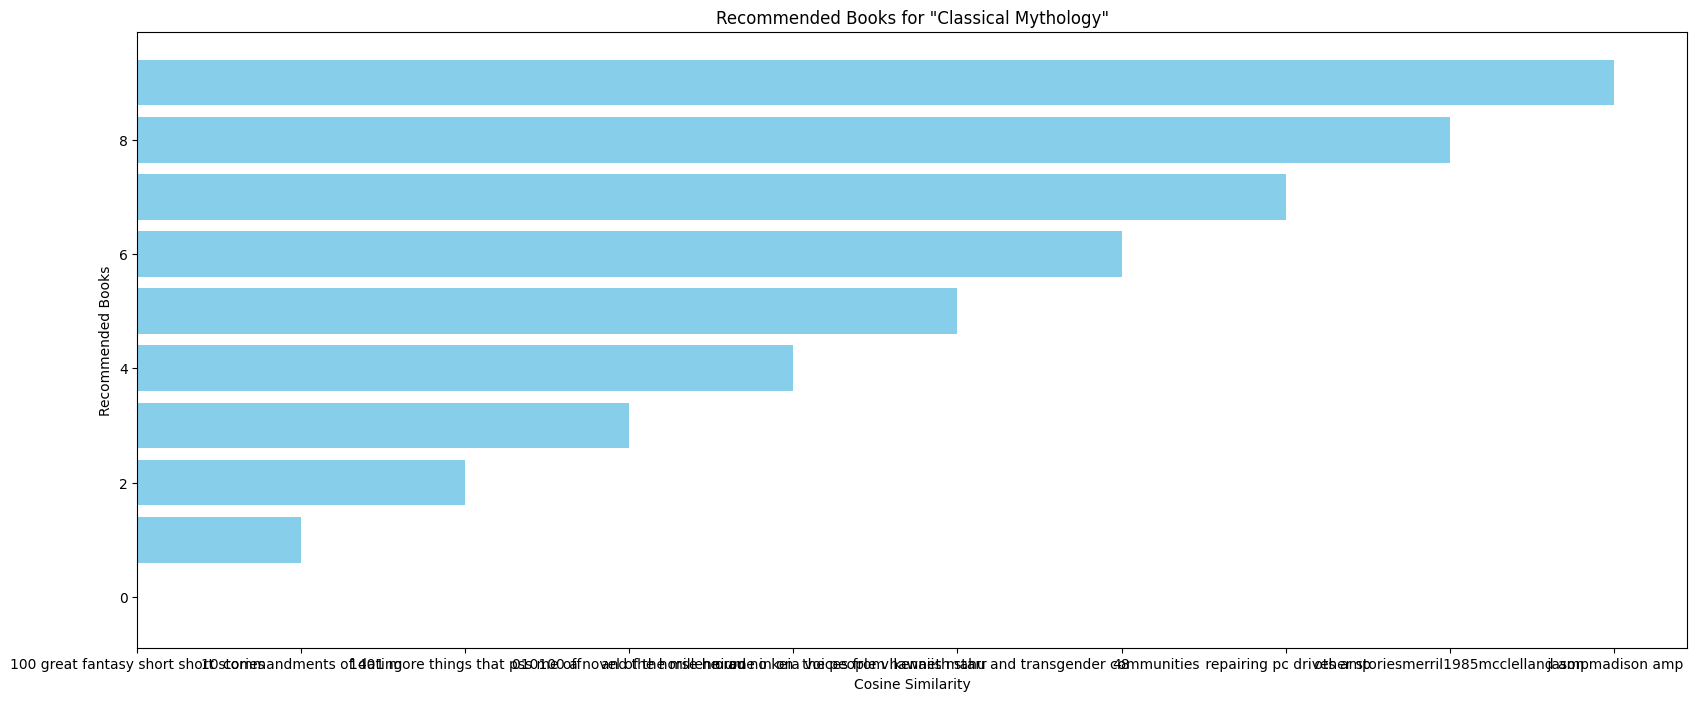

In [31]:
# Visualize the recommendations
visualize_recommendations(book_title_to_recommend, recommendations)